# MLDM Lab week 6: Comparing the performance of different algorithms on different datasets and preparations for Relational Learning

<h3> <font color="blue"> Introduction </h3>

In this lab session, we combine the exercises from previous weeks and compare the performance of different learning algorithms on different datasets.
    
We also introduce 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. Having SWI-Prolog and pyswip installed, we also try a simple relational learning problem (i.e. Michalski's trains problem) using the ILP system Aleph. 
    
Please make sure that you complete the installation of SWI-Prolog and pyswip and test it on Michalski's trains problem before the main lab session on Relational Learning (next week).

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1. Comparing the performance of different learning algorithms on different datasets and using relevant `sklearn` libraries </p>
<p> 2. Installation of 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. </p>
<p> 3. Testing the installation of SWI-Prolog and pyswip using Aleph on the train problem. </p>

## <font color="blue"> Combining the exercises from previous weeks to compare the performance of different learning algorithms on different datasets
 

<h3><font color="red">Exercise 1 </font> </h3>
<p> Extend the 10-fold cross-validation exercises from previous weeks to compare the performance of Decision tree, Perceptron, MLP, NB and SVM on four datasets (i.e. Iris, Breast Cancer, Spam and Digits)</p>
</p>

Performance of various models on the Iris dataset: 

Decision tree: 0.940000 (0.055377)
Perceptron: 0.833333 (0.123828)


C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reac

MLP: 0.960000 (0.044222)
GaussianNB: 0.960000 (0.044222)
SVM: 0.960000 (0.044222)


C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


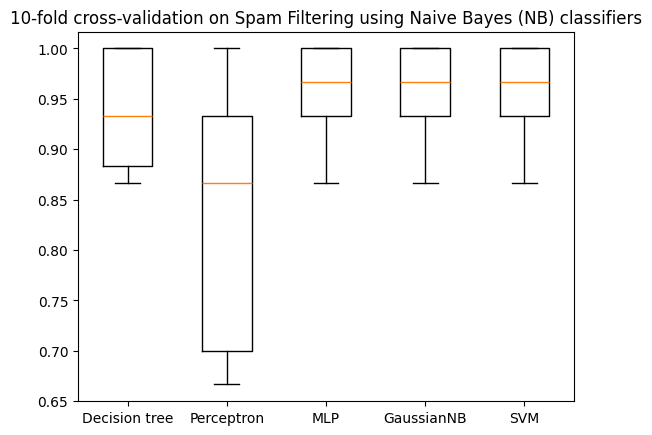

--------------------------------------------------------------------------------------------------
Performance of various models on the Breast Cancer dataset: 

Decision tree: 0.942011 (0.027219)
Perceptron: 0.850470 (0.072471)
MLP: 0.788816 (0.163344)
GaussianNB: 0.938503 (0.029591)
SVM: 0.924405 (0.017746)


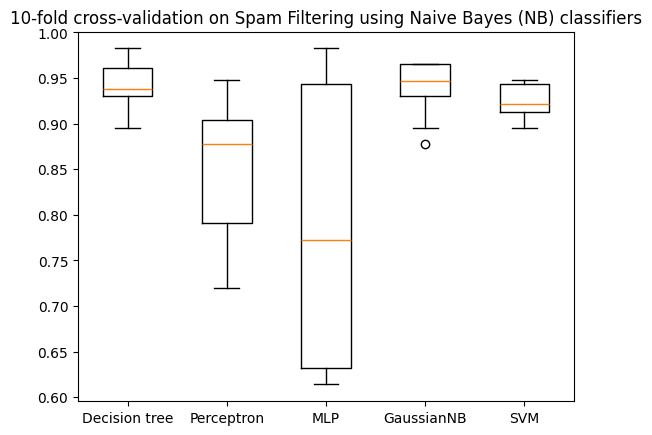

--------------------------------------------------------------------------------------------------
Performance of various models on the Spam dataset: 

Decision tree: 0.957292 (0.014321)
Perceptron: 0.975000 (0.008333)
MLP: 0.987500 (0.007795)
GaussianNB: 0.934375 (0.020859)
SVM: 0.966667 (0.020729)


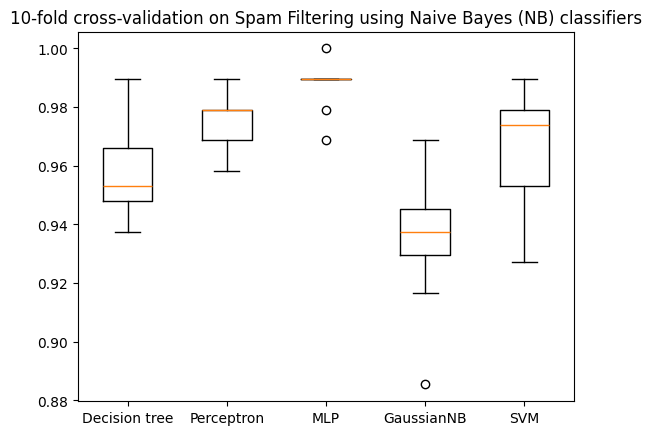

--------------------------------------------------------------------------------------------------
Performance of various models on the Digits dataset: 

Decision tree: 0.869804 (0.023296)
Perceptron: 0.944330 (0.018370)


C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Meow Chan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reac

MLP: 0.887592 (0.016272)
GaussianNB: 0.839745 (0.026502)
SVM: 0.989981 (0.004855)


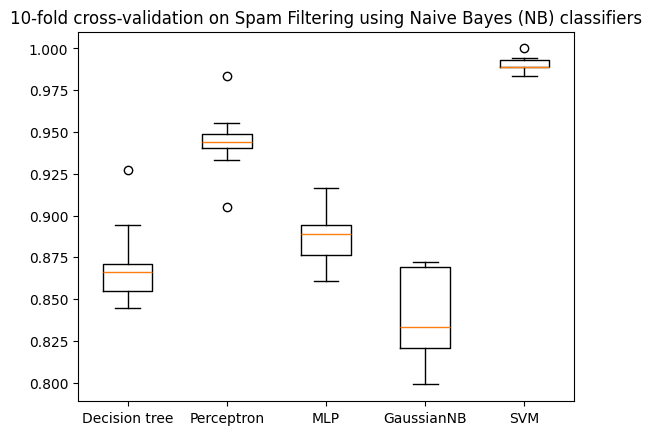

In [29]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import collections
DICT_SIZE = 500

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Standardize features
sc = StandardScaler()
sc.fit(X)  
X_std = sc.transform(X)

# Initialize the model
models = []
models.append(('Decision tree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=1)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=900)))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', svm.SVC(gamma=0.001)))

print("Performance of various models on the Iris dataset: \n")
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_std, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()


print("--------------------------------------------------------------------------------------------------")
print("Performance of various models on the Breast Cancer dataset: \n")

X, y = load_breast_cancer(return_X_y=True)

# Perform 10-fold cross-validation
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()
print("--------------------------------------------------------------------------------------------------")
print("Performance of various models on the Spam dataset: \n")

def get_dictionary(mail_dir):
	emails = [os.path.join(mail_dir,f) for f in os.listdir(mail_dir)]    
	all_words = []	
	for email in emails:
		#if the file is a directory, recursively add the words in that directory
		if(os.path.isdir(email)):
			all_words += get_dictionary(email)
		#otherwise, add the words from the email file.
		else:
			with open(email) as m:
				for line in m:
					words = line.split()
					all_words += words
	return all_words

def make_dictionary(all_words):
	dictionary = collections.Counter(all_words)
	#print(dictionary)
	list_to_remove = dictionary.keys()
	#print(list_to_remove)
	for item in list(dictionary.keys()):
		if item.isalpha() == False:
			del dictionary[item]
		elif len(item) == 1:
			del dictionary[item]
	dictionary = dictionary.most_common(DICT_SIZE)
	return dictionary

def get_features(mail_dir,dictionary):
	files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]		
	feature_matrix = np.zeros((len(files),DICT_SIZE))
	docID = 0
	for fil in files:
		with open(fil) as m:
			for i,line in enumerate(m):
				if(i==0):
					words  = line.split()
					for word in words:
						for i,d in enumerate(dictionary):
							#if email word is in the dictionary, count the number of occurances of it.
							if(d[0] == word):
								feature_matrix[docID, i] = words.count(word)
		docID = docID + 1
	return feature_matrix	

all_words = get_dictionary('Ling_spam_data')
dictionary = make_dictionary(all_words)

spam = get_features('./Ling_spam_data/spam',dictionary)
ham = get_features('./Ling_spam_data/ham',dictionary)

filename = 'spam.save'
pickle.dump(spam, open(filename, 'wb'))
filename = 'ham.save'
pickle.dump(ham, open(filename, 'wb'))

spam =  pickle.load(open('spam.save', 'rb'),encoding='latin1')
ham =  pickle.load(open('ham.save', 'rb'),encoding='latin1')
data_set=np.concatenate((spam, ham))
data_labels = np.zeros(len(ham) + len(spam))
data_labels[0:len(spam)] = 1


results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, data_set, data_labels, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()
print("--------------------------------------------------------------------------------------------------")
print("Performance of various models on the Digits dataset: \n")

digits = datasets.load_digits()
#_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, data, digits.target, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Spam Filtering using Naive Bayes (NB) classifiers')
pyplot.show()

## <font color="blue"> Preparations for Relational Learning
    
In this lab session we install SWI-Prolog and 'pyswip', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. We also test these installations using the ILP system Aleph on the train problem.

### <font color="blue"> SWI-Prolog

If you are using the Linux machines in the labs, SWI-Prolog is already installed on the Linux lab machines. This is a free software and you can also istall this on your own computer. Please visit SWI-Prolog website for more information:
https://www.swi-prolog.org/download/stable
    
If you have not used Prolog before, you may start from the beginner's tutorial: 
https://www.swi-prolog.org/pldoc/man?section=quickstart
    
    
You may also find the SWISH graphical interface and the examples useful:
https://swish.swi-prolog.org/example/examples.swinb
    
    
### <font color="blue"> PySwip
    
PySwip is a Python interface to SWI-Prolog enabling us to run Prolog programs within Python. We need to install 'pyswip' library to be able to use the Realtional Learning and ILP systems which are implemented in Prolog (e.g Aleph) within a Jupyter notebook. 

More information about PySwip can be found from the following website:
https://pypi.org/project/pyswip/
    
You can install PySwip using one of the following commands:    

In [3]:
#!pip install pyswip 
# Or 
#!pip3 install pyswip 

### <font color="blue"> Aleph
    
Aleph is an Inductive Logic Programming (ILP) system developed by Ashwin Srinivasan: http://www.cs.ox.ac.uk/activities/machlearn/Aleph/

In this lab we use a porting of Aleph v.5 to SWI-Prolog prepared by Fabrizio Riguzzi:
https://github.com/friguzzi/aleph

### <font color="blue"> PyILP

PyILP is  novel user-friendly Python/Jupyter interface for Inductive Logic programming(ILP) system for teaching relational machine learning and comparing different algorithms developed by Dany Varghese. 
You can refer https://github.com/danyvarghese/PyILP for further information about PyILP. 
    
You can install PyILP using the following command:

In [3]:
pip install PyILP

### <font color="blue"> Michalski’s trains problem

Michalski’s trains problem is a classic machine learning problem where the learning task is to discover a general pattern or rule that can be used to classify five eastbound trains vs five westbound trains as shown in the figure below. 
        
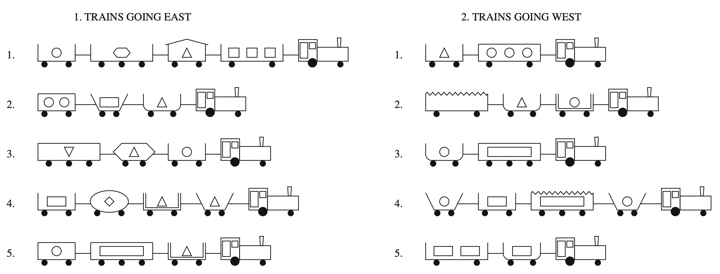


This problem can be represented as a Relational Learning problem as shown below:
    
```
:-begin_in_pos. % Positive examples
eastbound(east1).
eastbound(east2).
eastbound(east3).
eastbound(east4).
eastbound(east5).
:-end_in_pos.
    
:-begin_in_neg. % Negative examples
eastbound(west6).
eastbound(west7).
eastbound(west8).
eastbound(west9).
eastbound(west10).
:-end_in_neg.
    
:-begin_bg. % Background knowledge
% type definitions
car(car_11).  car(car_12).  car(car_13).  car(car_14).
car(car_21).  car(car_22).  car(car_23).
car(car_31).  car(car_32).  car(car_33).
car(car_41).  car(car_42).  car(car_43).  car(car_44).
car(car_51).  car(car_52).  car(car_53).
car(car_61).  car(car_62).
car(car_71).  car(car_72).  car(car_73).
car(car_81).  car(car_82).
car(car_91).  car(car_92).  car(car_93).  car(car_94).
car(car_101).  car(car_102).

shape(elipse).  shape(hexagon).  shape(rectangle).  shape(u_shaped).
shape(triangle). shape(circle). shape(nil).

train(east1).  train(east2).  train(east3).  train(east4).  train(east5).
train(west6).  train(west7).  train(west8).  train(west9).  train(west10).


% eastbound train 1
short(car_12).
closed(car_12).
long(car_11).
long(car_13).
short(car_14).
open_car(car_11).
open_car(car_13).
open_car(car_14).
shape(car_11,rectangle). 
shape(car_12,rectangle).
shape(car_13,rectangle).
shape(car_14,rectangle).
load(car_11,rectangle,3). 
load(car_12,triangle,1).
load(car_13,hexagon,1).
load(car_14,circle,1).
wheels(car_11,2).
wheels(car_12,2).
wheels(car_13,3).
wheels(car_14,2).
has_car(east1,car_11). 
has_car(east1,car_12).
has_car(east1,car_13).
has_car(east1,car_14).

% eastbound train 2
has_car(east2,car_21).
has_car(east2,car_22).
has_car(east2,car_23).
short(car_21).
short(car_22).
short(car_23).
shape(car_21,u_shaped).
shape(car_22,u_shaped).
shape(car_23,rectangle).
open_car(car_21).
open_car(car_22).
closed(car_23).
load(car_21,triangle,1).
load(car_22,rectangle,1).
load(car_23,circle,2).
wheels(car_21,2).
wheels(car_22,2).
wheels(car_23,2).

% eastbound train 3
has_car(east3,car_31).
has_car(east3,car_32).
has_car(east3,car_33).
short(car_31).
short(car_32).
long(car_33).
shape(car_31,rectangle).
shape(car_32,hexagon).
shape(car_33,rectangle).
open_car(car_31).
closed(car_32).
closed(car_33).
load(car_31,circle,1).
load(car_32,triangle,1).
load(car_33,triangle,1).
wheels(car_31,2).
wheels(car_32,2).
wheels(car_33,3).

% eastbound train 4
has_car(east4,car_41).
has_car(east4,car_42).
has_car(east4,car_43).
has_car(east4,car_44).
short(car_41).
short(car_42).
short(car_43).
short(car_44).
shape(car_41,u_shaped).
shape(car_42,rectangle).
shape(car_43,elipse).
shape(car_44,rectangle).
double(car_42).
open_car(car_41).
open_car(car_42).
closed(car_43).
open_car(car_44).
load(car_41,triangle,1).
load(car_42,triangle,1).
load(car_43,rectangle,1).
load(car_44,rectangle,1).
wheels(car_41,2).
wheels(car_42,2).
wheels(car_43,2).
wheels(car_44,2).

% eastbound train 5
has_car(east5,car_51).
has_car(east5,car_52).
has_car(east5,car_53).
short(car_51).
short(car_52).
short(car_53).
shape(car_51,rectangle).
shape(car_52,rectangle).
shape(car_53,rectangle).
double(car_51).
open_car(car_51).
closed(car_52).
closed(car_53).
load(car_51,triangle,1).
load(car_52,rectangle,1).
load(car_53,circle,1).
wheels(car_51,2).
wheels(car_52,3).
wheels(car_53,2).

% westbound train 6
has_car(west6,car_61).
has_car(west6,car_62).
long(car_61).
short(car_62).
shape(car_61,rectangle).
shape(car_62,rectangle).
closed(car_61).
open_car(car_62).
load(car_61,circle,3).
load(car_62,triangle,1).
wheels(car_61,2).
wheels(car_62,2).

% westbound train 7
has_car(west7,car_71).
has_car(west7,car_72).
has_car(west7,car_73).
short(car_71).
short(car_72).
long(car_73).
shape(car_71,rectangle).
shape(car_72,u_shaped).
shape(car_73,rectangle).
double(car_71).
open_car(car_71).
open_car(car_72).
jagged(car_73).
load(car_71,circle,1).
load(car_72,triangle,1).
load(car_73,nil,0).
wheels(car_71,2).
wheels(car_72,2).
wheels(car_73,2).

% westbound train 8
has_car(west8,car_81).
has_car(west8,car_82).
long(car_81).
short(car_82).
shape(car_81,rectangle).
shape(car_82,u_shaped).
closed(car_81).
open_car(car_82).
load(car_81,rectangle,1).
load(car_82,circle,1).
wheels(car_81,3).
wheels(car_82,2).

% westbound train 9
has_car(west9,car_91).
has_car(west9,car_92).
has_car(west9,car_93).
has_car(west9,car_94).
short(car_91).
long(car_92).
short(car_93).
short(car_94).
shape(car_91,u_shaped).
shape(car_92,rectangle).
shape(car_93,rectangle).
shape(car_94,u_shaped).
open_car(car_91).
jagged(car_92).
open_car(car_93).
open_car(car_94).
load(car_91,circle,1).
load(car_92,rectangle,1).
load(car_93,rectangle,1).
load(car_93,circle,1).
wheels(car_91,2).
wheels(car_92,2).
wheels(car_93,2).
wheels(car_94,2).

% westbound train 10
has_car(west10,car_101).
has_car(west10,car_102).
short(car_101).
long(car_102).
shape(car_101,u_shaped).
shape(car_102,rectangle).
open_car(car_101).
open_car(car_102).
load(car_101,rectangle,1).
load(car_102,rectangle,2).
wheels(car_101,2).
wheels(car_102,2).
:-end_bg.
```

<h3><font color="red">Exercise 2 </font> </h3>
<p> 
Please download Aleph_Files.zip from SurreyLearn and unzip the following files into your Python/Jupyter working directory: 'aleph.pl', 'train.pl', 'pos_example.f' and 'neg_example.n'. Then run the code below with Aleph to generate (induce) a rule for the trains problem described above. 
</p>


In [ ]:
from  PyILP.PyILP import *
model_1=aleph_learn(file="train.pl", test_size=0)

If you managed to run this code and get a hypothesis then Congratulations! You have successfully installed SWI-Prolog and PySwip and you are ready for more relational learning exercises next week. If you are getting error messages, then please go back to the instructions above and the web pages related to the installations of SWI-Prolog and PySwip. 

Assuming that you have installed SWI-Prolog, you can also run Aleph on the trains problem at the command line. Call SWI-Prolog by typing 'swipl' at command line and then load the <b>trains_1 file</b> at the Prolog prompt and then the 'induce' command to induce a hypothesis:

```
$ swipl
Welcome to SWI-Prolog (threaded, 64 bits, version 8.2.4)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- [train_1].
true.

?- induce.
...
```

If you still cannot solve the problem then please ask your lab demonstrator to help you with this. After you managed to generate a hypothesis then please enter the hypothesis and the accuracy shown above in the box below.

Answer to Exercise 2



<h3><font color="red">Save your notebook after completing the exercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 6) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thursday 21 Mar  </h3> 
    

eastbound(A) :-   has_car(A,B), short(B), closed(B).  
Accuracy: 1
